# Machine Learning Lecture 1

**Abstract:** These exercises will familiarize you with the basics of doing regression and classification using scikit-learn.  You will also get an introduction to some techniques for estimating generalization performance.

Background reading: ["A few useful things to know about machine learning"](http://homes.cs.washington.edu/%7Epedrod/papers/cacm12.pdf), 

Before beginning, you should verify that you have scikit-learn and matplot lib installed properly.  To do so, run the following code block and make sure that you don't get any import errors.  Additionally, the version of the sklearn module should be at least 0.13.

In [1]:
import sklearn
import matplotlib

print sklearn.__version__

0.16.0


If you don't have the appropriate version of sklearn installed, try executing the following commands at the linux command prompt:

* `sudo apt-get install python-sklearn`
* `sudo pip install -U scikit-learn`

## What is Machine Learning

Tom Mitchell defines what it means for a computer program to learn in the following way: “A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.”

This definition highlights a key difference between machine learning and classical statistical methods.  That is, machine learning is chiefly concerned with improving future performance based on prior experience.

Another key difference with classical statistical methods is that machine learning focuses on the computational efficiency (in both time and space) of algorithms.  For instance, an active area of machine learning research is to create algorithms that have computational efficiency properties that work with “big data”.

## Doing machine learning using scikit-learn

The specific software package we will be using to do machine learning is called [scikit-learn](http://scikit-learn.org/stable/).  Scikit-learn is a very powerful package that supports a vast array of machine learning algorithms.  To get a sense of the toolkits capabilities check out the [examples page](http://scikit-learn.org/stable/auto_examples/index.html).

## Training versus testing performance: Multiple Regression Revisited

To better understand how machine learning differs from classical methods, let’s revisit multiple regression (see Lecture 12).

The first step will be to load a dataset to use for our analysis.  Scikit-learn comes with several toy datasets that are quite useful for getting an intuition for machine learning.  First, we will be working with a dataset of Boston real estate prices.  In order to load the data and print out a detailed description of this dataset use the following code:

In [2]:
from sklearn.datasets import *

data = load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

To learn a simple model of housing prices using multiple linear regression, print the model parameters, and print the coefficient of determination use:

In [3]:
from sklearn.datasets import *
from sklearn.linear_model import LinearRegression

data = load_boston()
model = LinearRegression()
model.fit(data.data, data.target)
print model.__dict__
print model.score(data.data, data.target)

{'normalize': False, 'n_jobs': 1, 'residues_': 11080.276284149873, 'fit_intercept': True, 'coef_': array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01]), 'copy_X': True, 'rank_': 13, 'intercept_': 36.491103280361187, 'singular_': array([  3.94958310e+03,   1.77662274e+03,   6.42864253e+02,
         3.66980826e+02,   1.59116390e+02,   1.18692322e+02,
         9.01718207e+01,   6.93889529e+01,   4.06572735e+01,
         2.44223087e+01,   1.13502686e+01,   5.50918200e+00,
         1.24178413e+00])}
0.740607742865


This code will tell us how well the model does on explaining the data we used to fit the model.  In machine learning, we focus on model performance on unseen data.  In order to estimate the performance of the system on unseen data, we can split the data into two sets: the training set and the test set.  The following code will fit a model just using the training data and print out the coefficient of determination for both the training and testing data:

In [4]:
from sklearn.datasets import *
from sklearn.cross_validation import train_test_split

data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.5)
model = LinearRegression()
model.fit(X_train, y_train)
print "Train R2 %f"%model.score(X_train,y_train)
print "Test R2 %f"%model.score(X_test,y_test)

Train R2 0.725551
Test R2 0.733712


This simple experiment gets at the idea that estimating your model’s performance using the same data used for fitting is not an accurate predictor of how well the model will do on new data.

Further, there is a relationship between model complexity, amount of training data, and the gap between the performance of a model on the training data versus the testing data.

To get a better handle on the Python script learn_dataset_linear_regression.py.  This script will generate a plot showing the R2 on the training and the test set versus the number of the 13 housing features included in the dataset.  For instance at the value of 3 on the x-axis a random subset of size 3 from the original 13 features was selected for learning.  This procedure was repeated 1,000 times to smooth out variability.

Questions:

1. Why do the curves look the way they do?

2. Does this remind you of any of the statistics we computed when we first saw multiple linear regression?

## Classification using scikit-learn

In addition to multiple regression, scikit-learn supports many other learning algorithms for both regression and classification.  In the classification setting, the goal is to assign a categorical label to an input rather than a continuous value (as in regression).  When doing classification, you will want to use both a evaluation function (to use the terminology in the Domingos paper) and a different learning algorithm.  To get started we will use an algorithm called multiple logistic regression that is built into scikit-learn.  Specifically, we will be building a model to classify images of handwritten digits.

To load the digits and display 10 of the examplars use the following code:

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

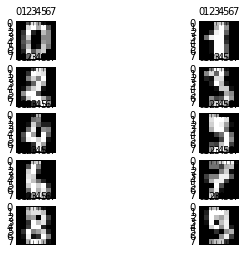

In [5]:
%matplotlib inline  
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy

digits = load_digits()
print digits.DESCR
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(5,2,i+1)
    subplot.matshow(numpy.reshape(digits.data[i],(8,8)),cmap='gray')

plt.show()

Next, we will use [multinomial logistic regression](http://en.wikipedia.org/wiki/Multinomial_logistic_regression) to learn to classify images of digits based on their pixel brightnesses.  As before, we split the data into two sets in order to get an accurate estimate of how well our model will work on future images of digits.

In [6]:
from sklearn.datasets import *
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.5)
model = LogisticRegression(C=10**-10)
model.fit(X_train, y_train)
print "Train accuracy %f" %model.score(X_train,y_train)
print "Test accuracy %f"%model.score(X_test,y_test)

Train accuracy 0.629176
Test accuracy 0.592881


## The relationship between the number of training examples and performance

Next, we will examine how the amount of training data influences the performance of the learned model.  Run the following code to generate a learning curve that shows the performance of the model on a testing set as a function of the amount of training examples used:

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

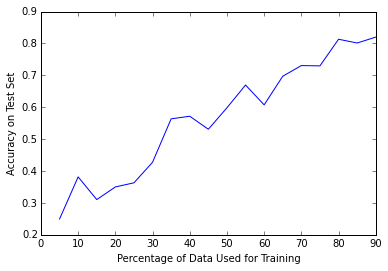

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import *
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_digits()
print data.DESCR
n_trials = 5
train_percentages = range(5,95,5)
test_accuracies = numpy.zeros(len(train_percentages))

for (i,train_percent) in enumerate(train_percentages):
        test_accuracy = numpy.zeros(n_trials)
        for n in range(n_trials):
                X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=train_percent/100.0)
                model = LogisticRegression(C=10**-10)
                model.fit(X_train, y_train)
                test_accuracy[n] = model.score(X_test, y_test)
        test_accuracies[i] = test_accuracy.mean()

fig = plt.figure()
plt.plot(train_percentages, test_accuracies)
plt.xlabel('Percentage of Data Used for Training')
plt.ylabel('Accuracy on Test Set')
plt.show()

**Questions:**

1.  What is the general trend?

2.  Are there parts of the curve that appear to be noisier than others?  Why?

To reduce the noise in the curve, increase the number of repeated random trials by editing the code.

## More Datasets

There are tons of datasets out there to use for learning.  The easiest place to start is to look at the [other toy datasets](http://scikit-learn.org/stable/datasets/) that are built into scikit-learn.  Two good places to start are the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) and [Kaggle](http://www.kaggle.com/).